Numpy 的优点：
ndarray，一个高效的多维数组，提供快速的面向数组的算术运算和灵活的广播功能
数学函数，用于对整个数据数组进行快速作，而无需编写循环
用于将阵列数据读取/写入磁盘以及处理内存映射文件的工具
线性代数、随机数生成和傅里叶变换能力
用于将 NumPy 与用 C、C++ 或 FORTRAN 编写的库连接起来的 C API

由于 NumPy 提供了全面且有据可查的 C API，因此将数据传递给用低级语言编写的外部库，以及外部库将数据作为 NumPy 数组返回给 Python 非常简单。此功能使 Python 成为包装旧版 C、C++ 或 FORTRAN 代码库并为其提供动态且可访问的界面的首选语言。

# 4.1 The NumPy ndarray: A Multidimensional Array Object

In [4]:
import numpy as np

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

%time for _ in range(10): my_arr2 = my_arr * 2

%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 8.01 ms, sys: 4.79 ms, total: 12.8 ms
Wall time: 13 ms
CPU times: user 375 ms, sys: 86.1 ms, total: 461 ms
Wall time: 466 ms


In [6]:
data = np.array([[1.5, -0.1, 3], [2, 0.5, 1]])
# ndarray 是元组的嵌套，数组内的元素必须是相同类型
# ndarray 的形状是一个元组，元组的长度就是数组的维度
data

array([[ 1.5, -0.1,  3. ],
       [ 2. ,  0.5,  1. ]])

In [7]:
data * 10

array([[15., -1., 30.],
       [20.,  5., 10.]])

In [8]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 4. ,  1. ,  2. ]])

In [10]:
print(data.dtype)
print(data.shape)

float64
(2, 3)


## Creating ndarrays

因为 numpy 主要用于数学计算，所以如果不明说，ndarray 的 type 是 float64

In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [ ]:
data2 = ([1, 2, 3, 4], [5, 6, 7, 8]) # nested tuple
data3 =[[[1, 2, 3], [4, 5, 6]]] # nested list
arr2 = np.array(data2)
arr3 = np.array(data3)

print(arr2)
print(arr3)

[[1 2 3 4]
 [5 6 7 8]]
[[[1 2 3]
  [4 5 6]]]


In [ ]:
print(arr2.ndim) # 获取维度,how many dimensions?
print(arr2.shape) # (n_rows, n_cols) 行， 列
print(arr2.size) # size = n_rows * n_cols
print(arr1.dtype)
print(arr2.dtype)


2
(2, 4)
8
float64
int64


In [ ]:
np.zeros(10) # 创建一个长度为10的零向量


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.ones((3, 6)) # 创建一个 3x6 的全 1 数组

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [ ]:
empty1 = np.empty((2, 3, 2)) # 创建一个空的数组
print(empty1)
print(empty1.shape) # (n_rows, n_cols, n_channels)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
(2, 3, 2)


In [11]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [40]:
np.arange(15).reshape(3, 5) # 定义一个3行5列的数组

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
np.random.randn(4, 4)

array([[-0.76441509, -0.10344674,  1.48576886, -1.47186611],
       [ 0.36758231, -0.1056503 , -0.16033925,  0.13947908],
       [-2.00807741,  0.26751224, -1.5630986 , -0.96588658],
       [-1.02092705,  0.92362875,  1.04925465,  0.18824814]])

## Data Types for ndarrays

In [24]:
 arr1 = np.array([1, 2, 3, 4, 5], dtype=np.int32)
 arr2 = np.array([6, 7, 8, 9, 10], dtype=np.float64)
 
print(arr1.dtype)
print(arr2.dtype)

int32
float64


In [25]:
arr1_float = arr1.astype(np.float64)
print(arr1_float)
print(arr1_float.dtype)

[1. 2. 3. 4. 5.]
float64


将 float 转化为 int 会发生什么？

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr_int = arr.astype(np.int32) # 直接删掉小数位，而不是四舍五入
print(arr_int)
print(arr_int.dtype)

[ 3 -1 -2  0 12 10]
int32


In [ ]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.bytes_) # 将字符串数组转换为浮点数
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [ ]:
int_array = np.array(range(10), dtype=np.int32)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
print(int_array.astype(calibers.dtype))
print(int_array.dtype)
# 调用 astype 始终会创建一个新数组（数据的副本），即使新数据类型与旧数据类型相同。

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
int32


## Arithmetic with NumPy Arrays

数组很重要，因为它们使您能够在不编写任何 for 循环的情况下表达对数据的批处理作。NumPy 用户称之为矢量化 。大小相等的数组之间的任何算术运算都按元素应用运算：

In [35]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr * arr)
print(arr - arr)

[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [37]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

In [5]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(arr[5])
print(arr[5:8])

6
[6 7 8]


In [6]:
arr[5:8] = 1279
arr

array([   1,    2,    3,    4,    5, 1279, 1279, 1279,    9,   10])

In [7]:
arr_slice = arr[5:8]
arr_slice[1] = 999
# 当在 arr_slice 中更改值时，突变会反映在原始数组 arr 中：
arr

array([   1,    2,    3,    4,    5, 1279,  999, 1279,    9,   10])

In [8]:
arr_slice[:] = 64 # 赋值给全部的arr_slice
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9, 10])

由于 NumPy 被设计为能够处理非常大的数组，因此如果 NumPy 坚持始终复制数据，您可以想象性能和内存问题。

如果你想要的是 ndarray 切片的副本而不是视图，则需要显式复制该数组，例如 arr[5:8].copy() 。正如你所见，pandas 也是这样工作的。
Numpy为了更高效地处理数据，因此与普通 python 不同，不允许频繁复制。

In [ ]:
arr_copy = arr[5:8].copy() # 用copy()方法创建一个数组的副本
arr_copy = 13
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9, 10])

In [10]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [11]:
arr2d[0][2] # 0行2列

np.int64(3)

In [12]:
arr2d[0,2] # 0行2列
# 与上一段代码等价

np.int64(3)

In [13]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [14]:
arr3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
old_values = arr3d[1].copy()
arr3d[1] = 12 # 赋值
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[12, 12, 12],
        [12, 12, 12]]])

In [ ]:
arr3d[1] = old_values # 再次赋值
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [20]:
arr3d[1,0]

array([7, 8, 9])

In [21]:
x = arr3d[0]

x[0]

array([1, 2, 3])

In [19]:
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9, 10])

In [23]:
arr[1:6] 
# 索引第 2 到第 6 个元素
# 从1开始，到6结束，不包括6
# 索引从0开始

array([ 2,  3,  4,  5, 64])

In [24]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [28]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

array([4, 5])

In [29]:
lower_dim_slice.shape

(2,)

In [51]:
arr2d[:2, 2:]

array([[3],
       [6]])

In [52]:
arr2d[:2,2]

array([3, 6])

In [53]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

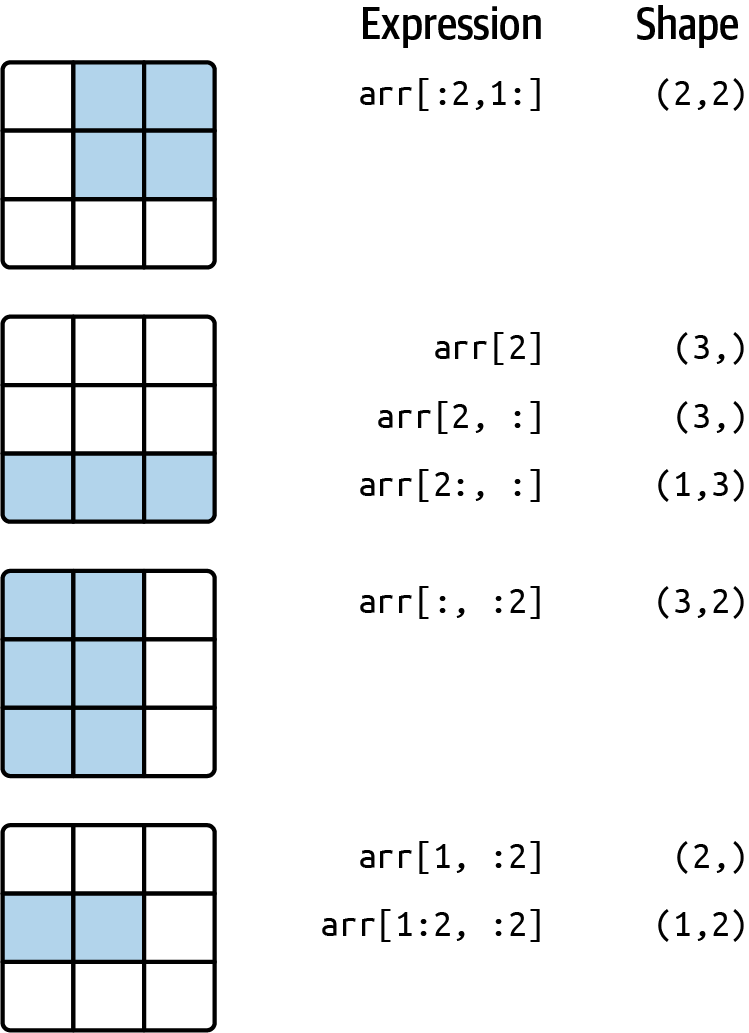

## Boolean Indexing

In [31]:
names = np.array(["bob", "joe", "will", "bob", "will", "joe", "joe"])

data =  np.array([[4, 7], [0, 2], [-5, 6], [0, 12], [-1, 12], [7, 4], [2, -5]])

names

array(['bob', 'joe', 'will', 'bob', 'will', 'joe', 'joe'], dtype='<U4')

In [32]:
data

array([[ 4,  7],
       [ 0,  2],
       [-5,  6],
       [ 0, 12],
       [-1, 12],
       [ 7,  4],
       [ 2, -5]])

In [33]:
names == 'bob'

array([ True, False, False,  True, False, False, False])

In [ ]:
data[names == 'bob']

array([[ 4,  7],
       [ 0, 12]])

In [ ]:
# boolean match method
array([[ 4,  7],  True
       [ 0,  2],  False
       [-5,  6],  False
       [ 0, 12],  True
       [-1, 12],  False
       [ 7,  4],  False
       [ 2, -5]]) False

In [35]:
data[names == 'bob', 1:]

array([[ 7],
       [12]])

In [36]:
data[names == 'bob', 1]

array([ 7, 12])

In [38]:
print(~(names == 'bob'))
# “～”语法是取布尔值的相反值，在复杂布尔值算法下，非常方便。
print((names != 'bob'))

[False  True  True False  True  True  True]
[False  True  True False  True  True  True]


In [39]:
data[names != 'bob']

array([[ 0,  2],
       [-5,  6],
       [-1, 12],
       [ 7,  4],
       [ 2, -5]])

In [40]:
cond = names == 'bob'

data[~cond]

array([[ 0,  2],
       [-5,  6],
       [-1, 12],
       [ 7,  4],
       [ 2, -5]])

通过布尔索引从数组中选择数据并将结果分配给新变量始终会创建数据的副本，即使返回的数组没有改变。

Python 关键字 and 和 or 不适用于布尔数组。请使用 & （与）和 | （或）代替。

In [44]:
mask = (names == 'bob') | (names == 'will')
mask

array([ True, False,  True,  True,  True, False, False])

In [52]:
mask2 = (names == 'bob') & (names == 'will')
mask2

array([False, False, False, False, False, False, False])

使用布尔数组设置值的方法

In [ ]:
data[data < 0] = 55 # Set all negative values to 55
data

array([[ 4,  7],
       [ 0,  2],
       [55,  6],
       [ 0, 12],
       [55, 12],
       [ 7,  4],
       [ 2, 55]])

In [50]:
data[:, 1] = 1
data

array([[7, 1],
       [0, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [2, 1]])

In [51]:
data[names != 'joe', 0] = 7
data

array([[7, 1],
       [0, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [7, 1],
       [2, 1]])

## fancy indexing
与普通索引的区别
- 普通索引 arr[1:3] 会选择连续的行（从索引1到索引2）
- 花式索引 arr[[4, 3, 0, 6]] 允许您选择任意行并按照您指定的顺序排列

In [53]:
arr = np.zeros((8,4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [59]:
for i in range(8):
    arr[i] = i # 为数组赋值1-8
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [60]:
# 按特定顺序选择行的子集
arr[[4, 3, 0, 6]] # 双中括号 == 花式索引

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [61]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [83]:
arr =  np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [84]:
index_arr = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
index_arr
#  * 第一个列表 [1, 5, 7, 2] 是 行索引。
#  * 第二个列表 [0, 3, 1, 2] 是 列索引。
# 现在，我们根据这些坐标从原始数组 arr 中提取对应的元素：
#  * arr[1, 0] -> 在 arr 中找到第1行、第0列的元素，即 4。
#  * arr[5, 3] -> 在 arr 中找到第5行、第3列的元素，即 23。
#  * arr[7, 1] -> 在 arr 中找到第7行、第1列的元素，即 29。
#  * arr[2, 2] -> 在 arr 中找到第2行、第2列的元素，即 10

array([ 4, 23, 29, 10])

In [85]:
index_arr[:] = 0
print(arr)
print(index_arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[0 0 0 0]


In [71]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

In [ ]:
arr_chain = np.arange(32,64).reshape(8, 4)
arr_chain

array([[32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55],
       [56, 57, 58, 59],
       [60, 61, 62, 63]])

In [75]:
arr_chain[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[36, 39, 37, 38],
       [52, 55, 53, 54],
       [60, 63, 61, 62],
       [40, 43, 41, 42]])

In [ ]:
# 原始数组
arr = np.array([[ 0,  1,  2,  3],
                [ 0,  5,  6,  7],
                [ 8,  9,  0, 11],
                [12, 13, 14, 15],
                [16, 17, 18, 19],
                [20, 21, 22,  0]])

# --- 你的操作：变量重新赋值 ---
print("--- 行为1: 变量重新赋值 ---")
index_arr2_reassigned = arr[0:5]
index_arr2_reassigned = 0 # 只是让变量名指向了整数0
print(f"index_arr2_reassigned 的值现在是: {index_arr2_reassigned}")

print(arr) # arr 没有任何变化

# --- 正确的修改方式：就地修改 ---
print("--- 行为2: 就地修改视图内容 ---")
# 重新获取视图，避免被上面的操作影响
index_arr2_view = arr[0:5]
index_arr2_view[:] = 0 # 修改视图的所有元素内容
print(f"index_arr2_view 的值现在是:\n{index_arr2_view}")
print(arr) # arr 的前5行被成功修改为

--- 行为1: 变量重新赋值 ---
index_arr2_reassigned 的值现在是: 0
[[ 0  1  2  3]
 [ 0  5  6  7]
 [ 8  9  0 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]]


--- 行为2: 就地修改视图内容 ---
index_arr2_view 的值现在是:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
原数组 arr 是否改变？
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [20 21 22  0]]


## Transposing Arrays and Swapping Axes

In [87]:
arr_t = np.arange(15).reshape(3,5)
print(arr_t)
print(arr_t.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


矩阵乘法的规则是：结果矩阵中第 i 行、第 j 列的元素，等于第一个矩阵的第 i 行与第二个矩阵的第 j 列的点积


In [89]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])

print(arr)

np.dot(arr.T, arr)

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]


array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [ ]:
      我们来手动计算结果矩阵的第一个元素 `[0, 0]` (值为39) 是如何得到的：

       * 取 arr.T 的 第0行: [0, 1, 6, -1, 1]
       * 取 arr 的 第0列: [0, 1, 6, -1, 1]
       * 计算它们的点积：
          (0*0) + (1*1) + (6*6) + (-1*-1) + (1*1) = 0 + 1 + 36 + 1 + 1 = 39

      再来计算一个，比如结果矩阵的 `[1, 2]` 元素 (值为2)：

       * 取 arr.T 的 第1行: [1, 2, 3, 0, 0]
       * 取 arr 的 第2列: [0, -2, 2, -1, 1]
       * 计算它们的点积：
          (1*0) + (2*-2) + (3*2) + (0*-1) + (0*1) = 0 - 4 + 6 + 0 + 0 = 2

      以此类推，计算出整个 3x3 矩阵的所有元素。
      
   * 维度匹配: 只有当第一个矩阵的列数 (arr.T 的列数 = 5) 等于第二个矩阵的行数 (arr 的行数 = 5) 时，矩阵乘法才能进行。
   * 结果维度: 结果矩阵的形状由第一个矩阵的行数和第二个矩阵的列数决定，即 (3, 3)。
   * 应用: 这个操作在很多领域都有应用，例如在统计学中计算协方差矩阵，或是在机器学习中用于降维算法（如PCA）的计算。

In [ ]:
arr.T @ arr # matrix multiplication 等效于 np.dot(arr, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [91]:
arr.swapaxes(0, 1) # 等效于 arr.T

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

# 4.2 Pseudorandom Number Generation 伪随机生成

numpy.random 模块补充了内置的 Python  随机模块，其中包含从多种概率分布中高效生成整个样本值数组的函数。例如，您可以使用 numpy.random.standard_normal 以下命令从标准正态分布中获得 4 × 4 个样本数组：

In [92]:
samples = np.random.standard_normal(size = (4,4))
samples

array([[ 1.13100194,  1.15464906,  0.12326616,  0.71308105],
       [ 0.36021689, -0.25096   ,  2.05267325, -0.86824966],
       [-0.13533463,  0.86761491, -0.43994816, -0.37370725],
       [ 0.5207618 ,  1.52162393, -0.29357451,  0.15722341]])

python built-in method 🆚 numpy method

In [93]:
from random import normalvariate

N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

485 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
33.6 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


explicit generator 显式生成器

In [95]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2,3))
data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

In [96]:
type(rng)

numpy.random._generator.Generator

# 4.3 Universal Functions: Fast Element-Wise Array Functions
快速元素数组函数

In [ ]:
arr = np.arange(10)
print(np.sqrt(arr)) # sqrt ^0.5
print(np.exp(arr)) # e^x

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [ ]:
x = rng.standard_normal(5)
y = rng.standard_normal(5)
print(x)
print(y)
print(np.maximum(x,y)) 
print(np.add(x,y)) 

[ 0.7519394  -0.65876032 -1.22867499  0.25755777  0.31290292]
[-0.13081169  1.26998312 -0.09296246 -0.06615089 -1.10821447]
[ 0.7519394   1.26998312 -0.09296246  0.25755777  0.31290292]
[ 0.62112771  0.6112228  -1.32163744  0.19140688 -0.79531155]


In [103]:
arr = rng.standard_normal(7) * 5
arr

array([0.67978425, 6.73538882, 0.3057201 , 0.354573  , 2.16827269,
       1.3874183 , 2.65126193])

In [ ]:
remainder, whole_part = np.modf(arr) # 返回小数部分和整数部分
print(remainder)
whole_part

[0.67978425 0.73538882 0.3057201  0.354573   0.16827269 0.3874183
 0.65126193]


array([0., 6., 0., 0., 2., 1., 2.])

Ufuncs 接受一个可选的 out 参数，该参数允许它们将结果分配给现有数组（通常为 out = np.empty_like(x) 或 原对象），而不是创建一个新数组。因为 ufuncs 每运行一次，就会创建一块新的内存，所以通常情况下，out 参数省内存

In [ ]:
arr
print(arr)

out = np.zeros_like(arr)
# 输出：[0. 0. 0. 0. 0. 0. 0.]

np.add(arr, 1, out=out) # 将数组状态存到out中
np.add(arr, 1, out=arr) # 将结果存到arr中

print(out)
print(arr)
# 结果相同

[0.67978425 6.73538882 0.3057201  0.354573   2.16827269 1.3874183
 2.65126193]
[1.67978425 7.73538882 1.3057201  1.354573   3.16827269 2.3874183
 3.65126193]
[1.67978425 7.73538882 1.3057201  1.354573   3.16827269 2.3874183
 3.65126193]


# 4.4 Array-Oriented Programming with Arrays
面向数组的编程